In [1]:
%run ../algorithmeX.ipynb

## [Polyhexs](https://fr.wikipedia.org/wiki/Polyhex)

Pour tous $i,j\in \mathbf Z$, on définit l'*hexagone* $(i,j)$ ou $ij$ selon le schéma suivant (l'idée et le dessin sont honteusement copiés sur le TAOCP Vol 4B de D. Knuth p. 162 ex. 315)

![grille](grille.png)

où $\bar x=-x$.  
L'origine est le centre de l'hexagone $(0,0)$.

Les principes sont les mêmes que pour les [polyominos](../puzzles-carres/puzzles-carres.ipynb).

Ici, il y a 12 isométries de l'hexagone dont 6 sont directes.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['toolbar'] = 'None'

In [3]:
class PIECE:

    # une piece est un ensemble (frozenset) de couples
    def __init__(self,nom,piece,couleur = None):
        self.nom = nom
        self.piece = PIECE.normalise(piece)
        self.largeur = max(x for x,_ in self.piece) - min(x for x,_ in self.piece) + 1
        self.hauteur = max(y for _,y in self.piece) - min(y for _,y in self.piece) + 1
        self.couleur = couleur
      

    def __hash__(self):
        return hash(self.piece)

    def __eq__(self,q):
        return self.piece == q.piece

    def __str__(self):
        return str((self.nom,self.piece))

    def normalise(piece):
        min_x = min(x for x,_ in piece)
        min_y = min(y for _,y in piece)
        return frozenset((x - min_x, y - min_y) for x, y in piece)

    def transposee(self):
        return PIECE(self.nom, frozenset((x + y, -y) for x, y in self.piece))

    def rotation(self):
        return PIECE(self.nom, frozenset((x + y, -x) for x, y in self.piece))

    def isometriquesPlus(self):
        l = [self]
        for _ in range(5):
            p = l[-1].rotation()
            l.append(p)
        return list(set(l))
    
    def isometriques(self):
        l1 = self.isometriquesPlus()
        l2 = self.transposee().isometriquesPlus()
        return(list(set(l1 + l2)))
        
    def chgeBase(i,j):
        return 1.73205080756888 * (i + .5 * j), 1.5 * j 
    
    def hexagone():
         c, s = .8660254037, .5
         return ((c, 0., -c, -c, 0., c), (s, 1., s, -s, -1., -s))
    
    def plotHexagone(ax,i,j,**kwargs):
        x, y =  PIECE.chgeBase(i,j)
        h, k = PIECE.hexagone()
        ax.fill(list(map(lambda u: x + u, h)), list(map(lambda v: y + v, k)), **kwargs)

    def polygoneOfCouples(e):
        """e est un ensemble de couples d'entiers (i,j)
        representant une piece non nécessairement normalisée.
        Renvoie une liste de deux tuples pour le dessin de la piece.
        """
        h, k = PIECE.hexagone()
        segments = set()
        for i,j in e:
            x, y = PIECE.chgeBase(i,j)
            if (i + 1, j)     not in e: segments.add(((x + h[5], x + h[0]),(y + k[5],y + k[0])))
            if (i,     j + 1) not in e: segments.add(((x + h[0], x + h[1]),(y + k[0],y + k[1])))
            if (i - 1, j + 1) not in e: segments.add(((x + h[1], x + h[2]),(y + k[1],y + k[2])))
            if (i - 1, j)     not in e: segments.add(((x + h[2], x + h[3]),(y + k[2],y + k[3])))
            if (i,     j - 1) not in e: segments.add(((x + h[3], x + h[4]),(y + k[3],y + k[4])))
            if (i + 1, j - 1) not in e: segments.add(((x + h[4], x + h[5]),(y + k[4],y + k[5])))
        return segments
    
    def plotPolyhex(ax, e, couleur):
        for s in PIECE.polygoneOfCouples(e):
            ax.plot(*s, linewidth = 1, color = 'black')
        for i, j in e:
            PIECE.plotHexagone(ax, i, j,  facecolor = couleur, edgecolor='black', linewidth=.2)
        
    def plot(self):
        
        fig = plt.figure(facecolor='w', 
                         figsize = (self.largeur * 1.73205080756888 / 4., self.hauteur * 1.5 / 4.))
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        ax.set_title(self.nom)
        c = 'white' if self.couleur is None else self.couleur
        PIECE.plotPolyhex(ax, self.piece, c)

In [4]:
#------------------------------- monohex ------------------------------

Benzene = PIECE('Benzene', frozenset([(0,0)]))

#------------------------------- dihex --------------------------------

Naphtalene = PIECE('Naphtalene', frozenset([(0,0), (1,0)]), couleur = 'white')

#------------------------------- trihexs ------------------------------

Anthracene = PIECE('Anthracene', frozenset([(0,0), (1,0), (2,0)]), couleur = (.9,.9,.9))

Phenanthrene = PIECE('Phenanthrene', frozenset([          (1,1), 
                                                (0,0), (1,0)]), couleur = (.8,.8,.8))

Phenalene = PIECE('Phenalene', frozenset([    (0,1),
                                          (0,0), (1,0)]), couleur = (.7,.7,.7))
#------------------------------- tetrahexs ----------------------------

Bar = PIECE('Bar', frozenset([(0,0), (1,0), (2,0), (3,0)]), couleur='greenyellow')

Worm = PIECE('Worm', frozenset([(0,0), (1,0), (2,0), 
                                                 (3,-1)]), couleur='deepskyblue')

Antiworm = PIECE('Antiworm', frozenset([                (2,1),
                                       (0,0), (1,0), (2,0)]), couleur = 'red')


Pistol = PIECE('Pistol', frozenset([   (0,1),
                                    (0,0), (1,0), (2,0)]), couleur = 'yellow')

Propeller = PIECE('Propeller', frozenset([          (1,1),
                                          (0,0), (1,0),
                                                    (2,-1)]), couleur='skyblue')

Arch = PIECE('Arch', frozenset([       (0,2),
                                          (1,1), 
                                (0,0), (1,0)]), couleur='orange')

Bee = PIECE('Bee', frozenset([   (0,1),
                              (0,0), (1,0),
                                 (1,-1)]), couleur='lightyellow')

Wave = PIECE('Wave', frozenset([(-1,1),
                                    (0,0), (1,0), 
                                              (2,-1)]), couleur='plum')

#------------------------------- pentahexs (il y en a 22) -----------------

Ppistol = PIECE('Ppistol', frozenset([        (1,1), (2,1),
                                   (0,0), (1,0), (2,0)]), couleur = 'lightyellow')

Ppistol2 = PIECE('Ppistol2', frozenset([ (0,1), (1,1),
                                      (0,0), (1,0), (2,0)]), couleur = 'darkturquoise')

Pworm = PIECE('Pworm', frozenset([             (1,2),
                                                  (2,1),
                                 (0,0), (1,0), (2,0)]), couleur = 'r')

Pworm2 = PIECE('Pworm2', frozenset([             (2,2),
                                                  (2,1),
                                 (0,0), (1,0), (2,0)]), couleur = 'skyblue')


Pbee = PIECE('Pbee', frozenset([   (0, 1),
                                (0,0), (1,0), (2,0),
                                   (1,-1)]), couleur='green')

Ppropeller = PIECE('Ppropeller', frozenset([(0,0), (1,0),
                                               (1,-1),
                                           (1,-2),(2,-2)]), couleur='darkblue')



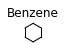

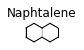

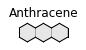

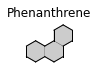

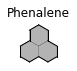

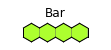

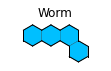

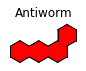

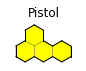

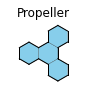

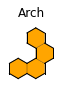

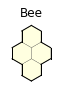

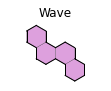

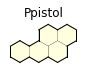

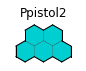

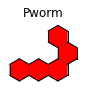

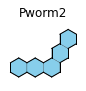

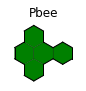

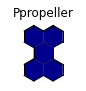

In [5]:
for p in [Benzene, Naphtalene, Anthracene, Phenanthrene, Phenalene,  
          Bar, Worm, Antiworm, Pistol, Propeller, Arch, Bee, Wave,
          Ppistol, Ppistol2, Pworm, Pworm2, Pbee, Ppropeller]: p.plot()

In [9]:

class PUZZLE:

    def __init__(self,pieces,
                      min_i,max_i,min_j,max_j,
                      conditions = None,
                      strict = True):
        """pieces : liste de PIECE
        min_i,max_i,min_j,max_j : definition du plateau
        conditions : couple d'entiers -> booleen restreignant le plateau
    
        1er cas  : strict = True
            Pour chacun des noms des pieces, il faut placer 
            une et une seule piece portant ce nom.
            Les elements de E sont les noms des pieces
            et les cases (couples d'entiers) du plateau.
            Chaque element de F contient un et un seul nom
            et les cases du plateau utilisees par une piece de ce nom..
        
        2eme cas : strict = False
            Pour chaque piece de pieces, on dispose,
            pour resoudre le puzzle, d'autant d'exemplaires
            que l'on veut de la piece.
            Les elements de E sont les cases du plateau.
        """
        self.min_i = min_i
        self.max_i = max_i
        self.min_j = min_j
        self.max_j = max_j
        self.strict = strict
        self.pieces = pieces
        if not conditions:
            conditions = lambda i,j: True
        lignes = dict()
        nbLignes = 0
        for p in pieces:
            for u in range(min_i, max_i - p.largeur + 2):
                for v in range(min_j, max_j - p.hauteur + 2):
                    ligne = [p.nom] if self.strict else []
                    match = True
                    for i,j in p.piece:
                        ic, jc = i + u, j + v
                        if conditions(ic,jc):
                            ligne.append((ic,jc))
                        else:
                            match = False
                            break
                    if match:
                        lignes[nbLignes] = ligne
                        nbLignes += 1
        self.lignes = lignes
        
    def solve(self):
        
        F = self.lignes
        return AlgorithmeX(F).solve()

    def printSolution(self,sol):     
        for l in sol: print(self.lignes[l])

    def plotSolution(self,sol):
                
        if not self.strict: 
            from random import random
            def r():
                return .6 + .4 * random()
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        # ax.axis([self.min_i - 1, self.max_i + 1, self.min_j - 1, self.max_j + 1])
        for l in sol:
            e = set()
            for c in self.lignes[l]:
                if type(c) == tuple:
                    e.add(c)
                else:
                    couleur = eval(c).couleur 
            if not self.strict: couleur = (r(),r(),r())
            PIECE.plotPolyhex(ax, e, couleur)

### Exemple

['Worm', (0, 0), (1, 0), (2, 0), (3, -1)]
['Phenalene', (6, -1), (6, 0), (5, 0)]
['Anthracene', (2, -2), (3, -3), (1, -1)]
['Wave', (4, -1), (3, 0), (5, -1), (6, -2)]
['Bee', (0, 3), (1, 2), (1, 3), (0, 2)]
['Propeller', (4, 1), (4, 0), (3, 2), (5, 1)]
['Bar', (1, 1), (2, 1), (0, 1), (3, 1)]
['Phenanthrene', (3, -2), (4, -2), (2, -1)]
['Arch', (2, 3), (3, 3), (4, 2), (2, 2)]
['Pistol', (5, -3), (5, -2), (6, -3), (4, -3)]


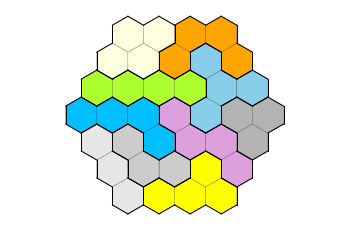

In [10]:
# 12 x 12290 solutions

polyhexs = [Worm]
for p in [Anthracene, Phenanthrene, Phenalene,  
          Bar, Pistol, Propeller, Arch, Bee, Wave]:
    polyhexs += p.isometriques()

puzzle = PUZZLE(polyhexs,0,6,-3,3,
                conditions = (lambda i,j: 0 <= i + j <= 6))
    
s = puzzle.solve()
        
sol = next(s)
puzzle.printSolution(sol)
puzzle.plotSolution(sol)

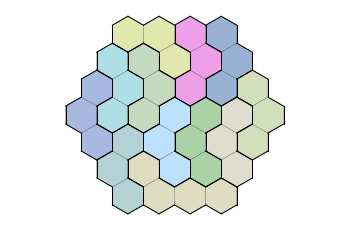

In [11]:
puzzle = PUZZLE(Phenanthrene.isometriques()+Worm.isometriques(),0,6,-3,3,
                conditions = (lambda i,j: 0 <= i + j <= 6), strict=False)
puzzle.plotSolution(next(puzzle.solve()))
       